maroon shape: (100, 100, 3)
royal_red shape: (100, 100, 3)
chartreuse shape: (100, 100, 3)


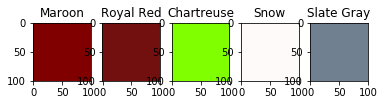

In [5]:
# How to tell if a color is a similar shade
import numpy as np
import matplotlib.pyplot as plt

# Two colors of the same shade
maroon = np.resize(np.array([128, 0, 0]), (100, 100, 3))
royal_red = np.resize(np.array([113, 16, 15]), (100, 100, 3))
chartreuse = np.resize(np.array([128, 255, 0]), (100, 100, 3))
snow = np.resize(np.array([255, 250, 250]), (100, 100, 3))
slate_gray = np.resize(np.array([112, 128, 144]), (100, 100, 3))

# Print matrix dimensions
print('maroon shape: {}'.format(maroon.shape))
print('royal_red shape: {}'.format(royal_red.shape))
print('chartreuse shape: {}'.format(chartreuse.shape))

# Display colors
plt.figure()
plt.subplot(1, 5, 1)
plt.title('Maroon')
plt.imshow(maroon)
plt.subplot(1, 5, 2)
plt.title('Royal Red')
plt.imshow(royal_red)
plt.subplot(1, 5, 3)
plt.title('Chartreuse')
plt.imshow(chartreuse)
plt.subplot(1, 5, 4)
plt.title('Snow')
plt.imshow(snow)
plt.subplot(1, 5, 5)
plt.title('Slate Gray')
plt.imshow(slate_gray)


In [2]:
# Convert colors to YIQ
def normalize(a: np.array, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

# Normalize before conversion
maroon_hat = normalize(maroon)
royal_red_hat = normalize(royal_red)
chartreuse_hat = normalize(chartreuse)
snow_hat = normalize(snow)
slate_gray_hat = normalize(slate_gray)

# Print matrix dimensions
print('maroon normalized: {}'.format(maroon_hat[0,0]))
print('royal_red normalized: {}'.format(royal_red_hat[0,0]))
print('chartreuse normalized: {}'.format(chartreuse_hat[0,0]))
print('snow normalized: {}'.format(snow_hat[0,0]))
print('slate gray normalized: {}'.format(slate_gray_hat[0,0]))


maroon normalized: [1. 0. 0.]
royal_red normalized: [0.98168127 0.13899912 0.13031167]
chartreuse normalized: [0.44861497 0.89372513 0.        ]
snow normalized: [0.58497164 0.57350161 0.57350161]
slate gray normalized: [0.50257071 0.57436653 0.64616234]


In [3]:
# Thanks: https://github.com/scikit-image/scikit-image/blob/master/skimage/color/colorconv.py
# Thanks: http://cs.haifa.ac.il/hagit/courses/ist/Lectures/Demos/ColorApplet/me/infoyiq.html
# NOTE: The Y parameter has the range [0,1], the I parameter has the range [-0.523,0.523], and the Q parameter has the range [-0.596,0.596].
def rgb2yiq(rgb: np.array):
    T_YIQ = np.array([
        [0.299, 0.587, 0.114],
        [0.596, -0.274, -0.322],
        [0.211, -0.523, 0.312]
    ])
    rgb = np.asanyarray(rgb)

    if rgb.ndim not in [3, 4] or rgb.shape[-1] != 3:
        msg = ("the input array must be have a shape == (.., ..,[ ..,] 3)), " +
               "got (" + (", ".join(map(str, rgb.shape))) + ")")
        raise ValueError(msg)
    
    return rgb.astype(np.float) @ T_YIQ.T.copy()

maroon_yiq = rgb2yiq(maroon_hat)
royal_red_yiq = rgb2yiq(royal_red_hat)
chartreuse_yiq = rgb2yiq(chartreuse_hat)
snow_yiq = rgb2yiq(snow_hat)
slate_gray_yiq = rgb2yiq(slate_gray_hat)

# Print matrix dimensions
print('maroon YIQ: {}'.format(maroon_yiq[0,0]))
print('royal_red YIQ: {}'.format(royal_red_yiq[0,0]))
print('chartreuse YIQ: {}'.format(chartreuse_yiq[0,0]))
print('snow YIQ: {}'.format(snow_yiq[0,0]))
print('slate_gray YIQ: {}'.format(slate_gray_yiq[0,0]))


maroon YIQ: [0.299 0.596 0.211]
royal_red YIQ: [0.38997071 0.50503592 0.17509545]
chartreuse YIQ: [ 0.65875253  0.02249383 -0.37276049]
snow YIQ: [0.57693115 0.00683614 0.00242018]
slate_gray YIQ: [ 0.5610843  -0.06590856  0.00725138]


In [4]:
# Compare shades

# Thanks: https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

theta_maroon_royal_red = angle_between(
    maroon_yiq[0,0][1:],
    royal_red_yiq[0,0][1:]
)
theta_maroon_chartreuse = angle_between(
    maroon_yiq[0,0][1:],
    chartreuse_yiq[0,0][1:]
)
theta_snow_slate_gray = angle_between(
    snow_yiq[0,0][1:],
    slate_gray_yiq[0,0][1:]
)

print('Angle of maroon and royal red: {} deg'.format(
    theta_maroon_royal_red*180/np.pi
))
print('Angle of maroon and chartreuse: {} deg'.format(
    theta_maroon_chartreuse*180/np.pi
))
print('Angle of snow and slate gray: {} deg'.format(
    theta_snow_slate_gray*180/np.pi
))


Angle of maroon and royal red: 0.3739494938684184 deg
Angle of maroon and chartreuse: 106.04206456205782 deg
Angle of snow and slate gray: 154.2261382496119 deg
